In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics # performance evaluation

In [9]:
#import Data
df_mail = pd.read_csv('mail_data.csv')
df_mail.sample(10)

,Category,Message
3072,ham,Apart from the one i told you about yesterday?
1616,ham,Mm i had my food da from out
3361,ham,Please attend the phone:)
4351,ham,Yes. Rent is very expensive so its the way we ...
199,ham,Hi its Kate how is your evening? I hope i can ...
262,ham,Anyway i'm going shopping on my own now. Cos m...
4112,spam,URGENT! Your Mobile number has been awarded a ...
1714,spam,Hard LIVE 121 chat just 60p/min. Choose your g...
463,spam,"UpgrdCentre Orange customer, you may now claim..."
714,ham,Save yourself the stress. If the person has a ...


In [13]:
# Print the column names to identify the correct column for spam labels
print(df_mail.columns)

Index(['Category', 'Message'], dtype='object')


In [19]:
# Updated counting script based on unique values found
if 'Category' in df_mail.columns:
    # Inspecting the unique values might reveal the correct spam indicator
    unique_values = df_mail['Category'].unique()
    print(f"Unique values in 'Category' column: {unique_values}")
    
    # Check if spam is represented by 'spam' or a string '1'
    if 'spam' in unique_values:
        spam_count = df_mail[df_mail['Category'] == 'spam'].shape[0]
    elif '1' in unique_values:
        spam_count = df_mail[df_mail['Category'] == '1'].shape[0]
    elif 1 in unique_values:
        spam_count = df_mail[df_mail['Category'] == 1].shape[0]
    else:
        print("Unable to determine the spam indicator. Please check the unique values.")
        spam_count = 0
    
    print(f'Number of spam texts: {spam_count}')
else:
    print("The column 'Category' does not exist in the dataset.")


Unique values in 'Category' column: ['ham' 'spam']
Number of spam texts: 747


In [23]:
if 'Category' in df_mail.columns:
    unique_values = df_mail['Category'].unique()
    print(f"Unique values in 'Category' column: {unique_values}")
    
    # Determine the spam and ham indicators
    spam_indicator = None
    ham_indicator = None
    
    if 'spam' in unique_values:
        spam_indicator = 'spam'
    elif '1' in unique_values:
        spam_indicator = '1'
    elif 1 in unique_values:
        spam_indicator = 1
    
    if 'ham' in unique_values:
        ham_indicator = 'ham'
    elif '0' in unique_values:
        ham_indicator = '0'
    elif 0 in unique_values:
        ham_indicator = 0
else:
    print("The column 'Category' does not exist in the dataset.")


Unique values in 'Category' column: ['ham' 'spam']


In [24]:
if spam_indicator is not None:
    spam_count = df_mail[df_mail['Category'] == spam_indicator].shape[0]
    print(f'Number of spam texts: {spam_count}')
else:
    print("Unable to determine the spam indicator. Please check the unique values.")


Number of spam texts: 747


In [25]:
if ham_indicator is not None:
    ham_count = df_mail[df_mail['Category'] == ham_indicator].shape[0]
    print(f'Number of ham texts: {ham_count}')
else:
    print("Unable to determine the ham indicator. Please check the unique values.")


Number of ham texts: 4825


In [26]:
df_mail.isnull().sum()

Category    0
Message     0
dtype: int64

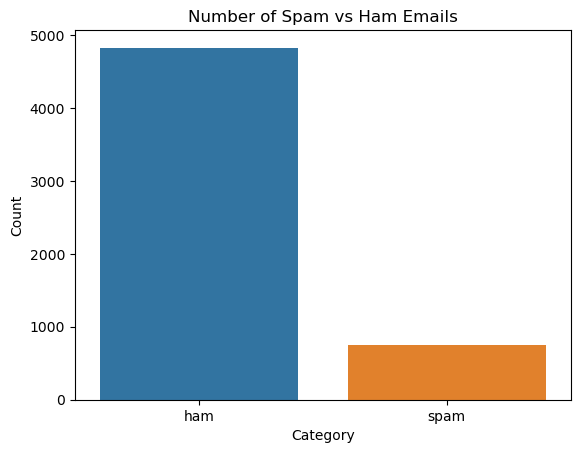

In [28]:
# Countplot
sns.countplot(x='Category', data=df_mail)
plt.title('Number of Spam vs Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [29]:
# Define X variables and our target (y)
X = df_mail.drop(['Category'], axis=1).values  # Assuming you have features other than 'Category'
y = df_mail['Category'].values

# Split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_mail['Message'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.25, random_state=101)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [44]:
# Define class weights
class_weights = {'spam': 1, 'ham': 4825 / 747}  # Weight ham class higher to balance the classes

# Train the logistic regression model with class weights
logistic_model_weighted = LogisticRegression(class_weight=class_weights)
logistic_model_weighted.fit(X_train, y_train)


LogisticRegression(class_weight={'ham': 6.459170013386881, 'spam': 1})

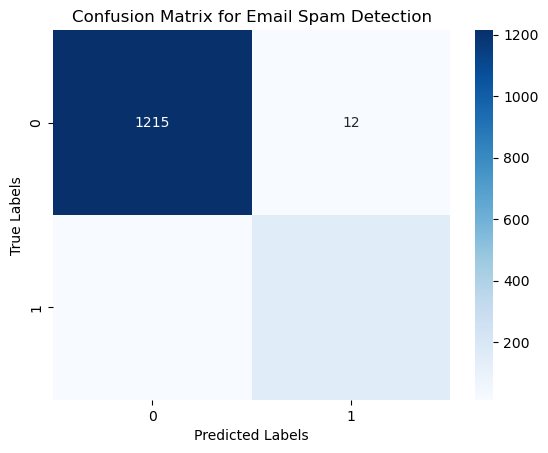

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1227
        Spam       0.93      0.90      0.91       166

    accuracy                           0.98      1393
   macro avg       0.96      0.95      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [48]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Email Spam Detection')
plt.show()
print(classification_report(y_test, y_predict, target_names=['Ham', 'Spam']))

In [51]:
from sklearn.metrics import accuracy_score
new_email_data = [
    {"message": "Congratulations! You've won a $1000 gift card. Click here to claim your prize.", "actual_label": 1},
    {"message": "Dear colleague, please find attached the meeting agenda for tomorrow.", "actual_label": 0},
    {"message": "Important: Your account has been compromised. Please reset your password immediately.", "actual_label": 1},
    {"message": "Hi, are we still meeting for lunch tomorrow?", "actual_label": 0}
]
new_email_messages = [email["message"] for email in new_email_data]
actual_labels = [email["actual_label"] for email in new_email_data]
new_email_messages_tfidf = tfidf_vectorizer.transform(new_email_messages)
predictions = logistic_model.predict(new_email_messages_tfidf)
accuracy = accuracy_score(actual_labels, predictions)
print(f"Accuracy of the predictions: {accuracy * 100:.2f}%")
predicted_labels = ['Spam' if label == 1 else 'Ham' for label in predictions]
actual_labels_text = ['Spam' if label == 1 else 'Ham' for label in actual_labels]
for i, message in enumerate(new_email_messages):
    print(f"Email message: {message}\nPredicted label: {predicted_labels[i]}, Actual label: {actual_labels_text[i]}\n")


Accuracy of the predictions: 100.00%
Email message: Congratulations! You've won a $1000 gift card. Click here to claim your prize.
Predicted label: Spam, Actual label: Spam

Email message: Dear colleague, please find attached the meeting agenda for tomorrow.
Predicted label: Ham, Actual label: Ham

Email message: Important: Your account has been compromised. Please reset your password immediately.
Predicted label: Spam, Actual label: Spam

Email message: Hi, are we still meeting for lunch tomorrow?
Predicted label: Ham, Actual label: Ham

